## Import Dependencies

In [63]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Data Collection & Processing

In [21]:
# load dataset to a pandas dataframe

loan_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan Status Prediction/dataset.csv")
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# shape of data

loan_dataset.shape

(614, 13)

In [23]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
# count of missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
# dropping missing values

loan_dataset = loan_dataset.dropna()

In [26]:
# count of missing values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# label encoding
label_encoder = LabelEncoder()

In [28]:
# Encode labels in column 'Loan_Status'.
loan_dataset['Loan_Status']= label_encoder.fit_transform(loan_dataset['Loan_Status'])
  
loan_dataset['Loan_Status'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

In [29]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [30]:
# Types of values in Dependents
loan_dataset.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [31]:
# replacing the value 3+ as 4
loan_dataset = loan_dataset.replace(to_replace="3+", value=4)

In [32]:
loan_dataset.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Data Visualization

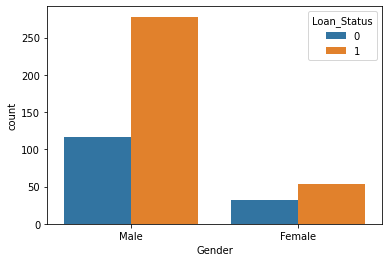

In [34]:
# Gender vs Loan Status
sns.countplot(x="Gender", hue="Loan_Status", data = loan_dataset)

Inference: The number of loans approved is more for males than females.

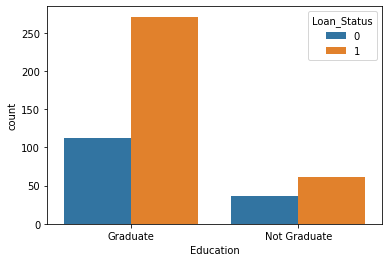

In [33]:
# Education vs Loan Status
sns.countplot(x="Education", hue="Loan_Status", data = loan_dataset)

Inference: The number of loans approved is more for graduated people than people having no graduation.

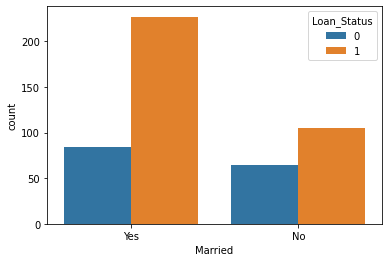

In [35]:
# Marital status vs Loan Status
sns.countplot(x="Married", hue="Loan_Status", data = loan_dataset)

Inference: The number of loans approved is more for married people than people who are not married.

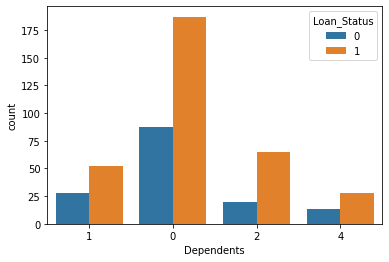

In [36]:
# Number of dependents vs Loan Status
sns.countplot(x="Dependents", hue="Loan_Status", data = loan_dataset)

Inference: The number of loans approved is more for people having no dependents.

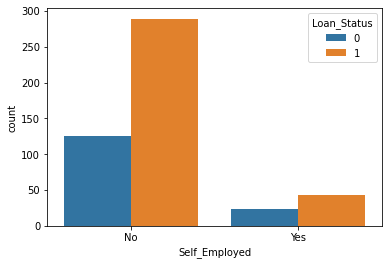

In [37]:
# Self_Employed vs Loan Status
sns.countplot(x="Self_Employed", hue="Loan_Status", data = loan_dataset)

Inference: The number of loans approved is more for people who are not self employed (i.e. They work for some company).

In [53]:
# Encode labels in column 'Gender'.
loan_dataset['Gender']= label_encoder.fit_transform(loan_dataset['Gender'])
  
loan_dataset['Gender'].unique()

array([1, 0])

In [54]:
# Encode labels in column 'Married'.
loan_dataset['Married']= label_encoder.fit_transform(loan_dataset['Married'])
  
loan_dataset['Married'].unique()

array([1, 0])

In [55]:
# Encode labels in column 'Self_Employed'.
loan_dataset['Self_Employed']= label_encoder.fit_transform(loan_dataset['Self_Employed'])
  
loan_dataset['Self_Employed'].unique()

array([0, 1])

In [56]:
# Encode labels in column 'Property_Area'.
loan_dataset['Property_Area']= label_encoder.fit_transform(loan_dataset['Property_Area'])
  
loan_dataset['Property_Area'].unique()

array([0, 2, 1])

In [58]:
# Encode labels in column 'Education'.
loan_dataset['Education']= label_encoder.fit_transform(loan_dataset['Education'])
  
loan_dataset['Education'].unique()

array([0, 1])

In [59]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [60]:
# Separating data and label

X = loan_dataset.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
Y = loan_dataset["Loan_Status"]

## Modelling

In [62]:
# splitting the data to train and test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(384, 11)
(96, 11)
(384,)
(96,)


### Training the model (SVM)

In [64]:
classifier = SVC(kernel='linear')

In [65]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Evaluation

In [69]:
# Training data accuracy
training_prediction = classifier.predict(X_train)
print(f"The accuracy for training data is : {accuracy_score(training_prediction, Y_train)}")

The accuracy for training data is : 0.8020833333333334


In [70]:
# Test data accuracy
test_prediction = classifier.predict(X_test)
print(f"The accuracy for test data is : {accuracy_score(test_prediction, Y_test)}")

The accuracy for test data is : 0.8229166666666666
